# Practice session 04 - section 05

Numerical Curve Fitting

## Background

Population models are often based on the rate of change of the population being proportional to the size of the population itself. This is due to the fact that the more individuals there are, the more offspring they can produce.

$$\frac{dp}{dt} = kp$$

If we integrate this, we get an exponential equation:

$$p(t) = p_0e^{kt}$$

In some cases, biological populations behave like this. Specifically, we can see exponential growth rates when the resources needed are not limiting, for example at the start of a bacterial culture, or when a species reaches a new habitat without competitors.

However, at some point, real populations reduce their rate of growth k, usually by reduced survival rates. This can be modeled by replacing k for from a constant to 

$$k = k_{max}\frac{f}{K + f}$$

where $k_{max}$ is the maximum possible growth rate, f is the limiting resource, and K is the half-saturation constant.

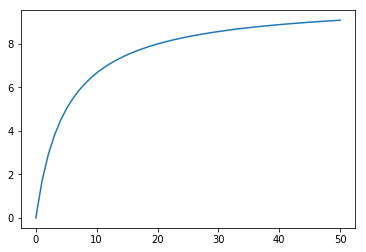

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

K = 5
f = np.linspace(0,50)
kmax = 10
k = kmax * f / (K + f)

plt.plot(f, k);

# Problem

## Background

We have characterized the growth rate of a pathogenic bacterium in a culture simulating its natural habitat, the human body. We have quantified its growth rate in $days^{-1}$ for different amounts of food (glucose, in this case) in the medium, measured in mg/l.


## Data


|f, mg/l|k, $days^{-1}$|
|----|------|
|7   | 0.29 |
|9   | 0.37 |
|15  | 0.48 |
|25  | 0.65 |
|40  | 0.80 |
|75  | 0.97 |
|100 | 0.99 |
|150 | 1.07 |

## Tasks

Knowing that we if we invert the equation that relates f, k, K and k_max, it can take a linear form,

* Estimate an equation to describe the relationship between f and k in this particular case, using linear regression. 

    * Linearize the equation
    * Plot the input points
    * Fit a linear regression
    * Invert the terms back
    * Formulate the estimated equation


* Plot the estimated equation and the input points, once in inverted form and once in the regular form.

## Solution

### Linearize the equation

$$k = k_{max}\frac{f}{K + f}$$

$$ \frac{1}{k} = \frac{K + f}{k_{max}f} = \frac{K}{k_{max}}\frac{1}{f} + \frac{1}{k_{max}}$$

$\frac{K}{k_{max}}$ will be the slope of the line we calculate, and $\frac{1}{k_{max}}$ will be the intercept.

### Plot the input points

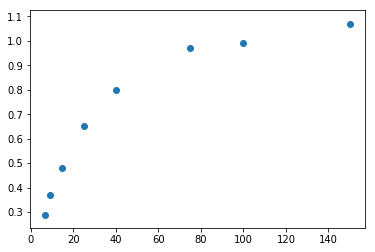

In [2]:
f = np.array([7, 9, 15, 25, 40, 75, 100, 150])
k = np.array([0.29, 0.37, 0.48, 0.65, 0.80, 0.97, 0.99, 1.07])

plt.scatter(f, k);

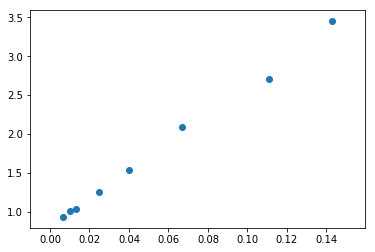

In [3]:
plt.scatter(1 / f, 1 / k);

### Fit a linear regression

In [4]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit((1/f).reshape(-1,1), 1/k)

slope, intercept = lr.coef_[0], lr.intercept_

### Invert the terms back 

In [5]:
K = slope / intercept
k_max = 1 / intercept
K, k_max

(22.19266586951898, 1.2304312927508558)

### Formulate the estimated equation

$$k = 1.23days^{-1}\frac{f}{22.20mg/ml + f}$$


### Plot the estimated equation and the input points

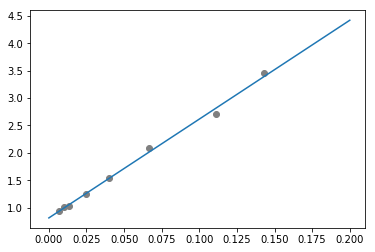

In [6]:
xs = np.linspace(0, .2)
estimates = lr.predict(xs.reshape(-1,1))
plt.scatter(1 / f, 1 / k, c='grey')
plt.plot(xs, estimates);

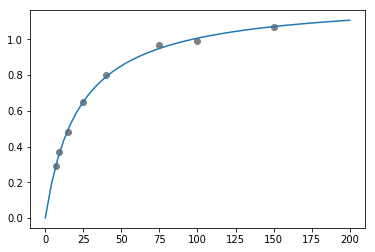

In [7]:
x_axis = np.linspace(0,200)
ks = k_max * x_axis / (K + x_axis)

plt.plot(x_axis, ks);
plt.scatter(f, k, c='grey');